# Step 1 - Importing all libraries used throughout the project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

# Step 2 - Importing data frames, analyzing and cleaning

## 2.1.1 - Importing Clients Dataframe (df_final_demo)

In [4]:
# Import first data frame 
df_final_demo= pd.read_csv("data/df_final_demo.txt")
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## 2.1.2 Exploring the Dataframe's columns

*Display basic information about the dataset*

In [5]:
display(df_final_demo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


None

*Displaying information about **clnt_tenure_yr** (client tenure in years), as well as plotting a histogram to visualize the column's values*

In [6]:

df_final_demo['clnt_tenure_yr'].value_counts() 

clnt_tenure_yr
6.0     7092
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

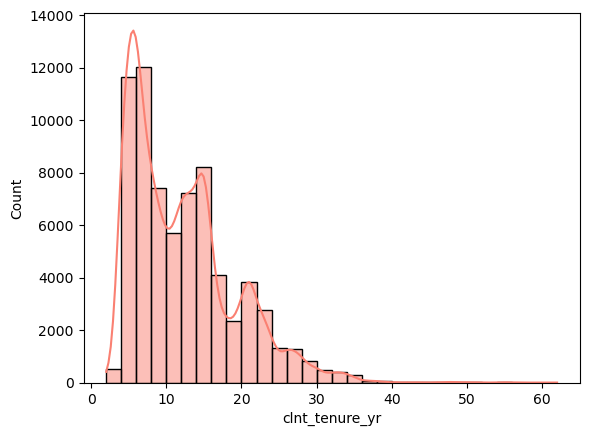

In [7]:
#Plotting a histogram for the 'clnt_tenure_yr' column 
sns.histplot(df_final_demo['clnt_tenure_yr'], kde=True, bins=30, color="salmon")

*Displaying iformation about **clnt_age** (client age), as well as plotting a histogram to visualize the column's values*

In [8]:
# Analysis in the client data frame
df_final_demo['clnt_age'].value_counts()

clnt_age
58.5    859
55.5    830
29.5    829
28.5    827
57.5    826
       ... 
96.0      2
14.0      2
94.5      1
95.5      1
13.5      1
Name: count, Length: 165, dtype: int64

<Axes: xlabel='clnt_age', ylabel='Count'>

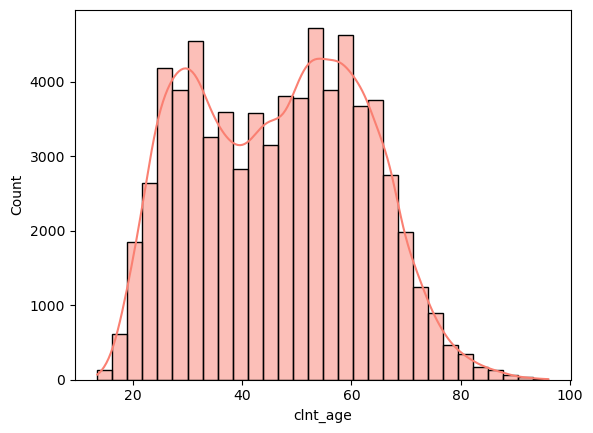

In [9]:
#Plotting a histogram for the 'clnt_age' column 
sns.histplot(df_final_demo['clnt_age'], kde=True, bins=30, color="salmon")

*Displaying iformation about **gendr** (gender), as well as creating a pie chart to visualize the column's values*

In [10]:
gender= df_final_demo.groupby("gendr")
gender.size() 

gendr
F    22746
M    23724
U    24122
X        3
dtype: int64

<Axes: ylabel='count'>

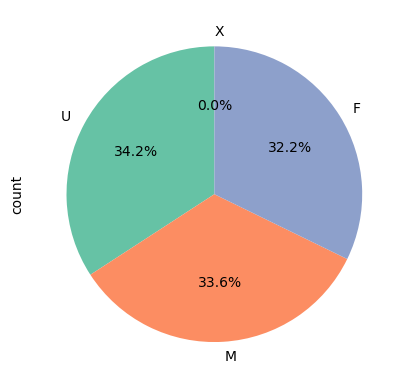

In [11]:
df_final_demo['gendr'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

*Displaying information about **num_accounts** (number of accounts), as well as creating a pie chart and histogram to visualize the column's values*

In [12]:
df_final_demo['num_accts'].value_counts()

num_accts
2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
7.0        8
1.0        2
8.0        1
Name: count, dtype: int64

<Axes: ylabel='count'>

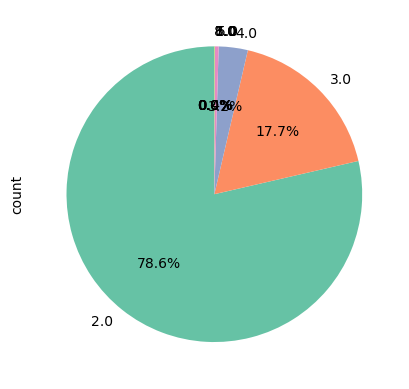

In [13]:
df_final_demo['num_accts'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))

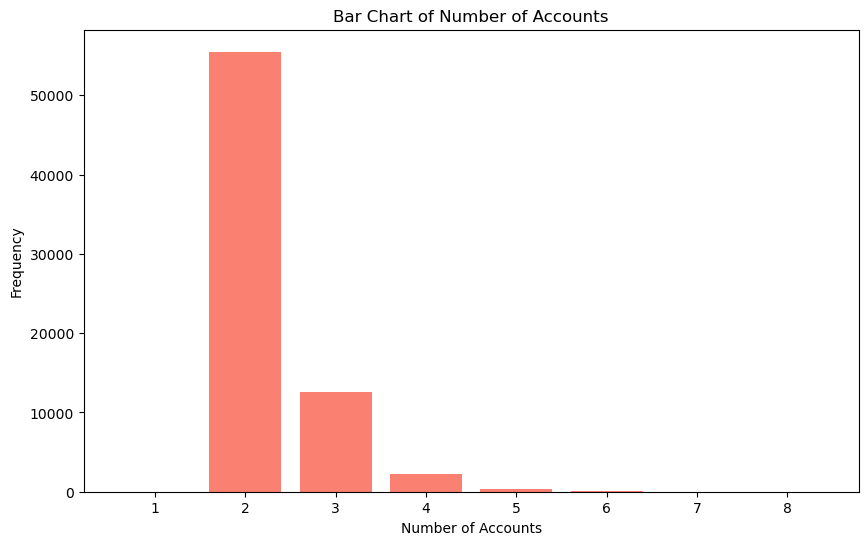

In [14]:
#Plotting a histogram for the 'num_accts' column 
# Assuming df_final_demo is your dataframe and 'num_accts' is your column
num_accts_counts = df_final_demo['num_accts'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(num_accts_counts.index, num_accts_counts.values, color='salmon')
plt.xlabel('Number of Accounts')
plt.ylabel('Frequency')
plt.title('Bar Chart of Number of Accounts')
plt.show()

*Displaying information about **bal** (balance)*

In [15]:
df_final_demo['bal'].value_counts()

bal
31188.62     5
29388.51     4
31398.74     3
29389.11     3
29388.50     3
            ..
26088.34     1
51203.28     1
94714.11     1
52086.48     1
157498.73    1
Name: count, Length: 70333, dtype: int64

In [16]:
df_final_demo.bal.describe()

count    7.059500e+04
mean     1.474452e+05
std      3.015087e+05
min      1.378942e+04
25%      3.734683e+04
50%      6.333290e+04
75%      1.375449e+05
max      1.632004e+07
Name: bal, dtype: float64

*Displaying information about **logons_6_mnth** (log on in the past 6 months), as well as creating a histogram to visualize the column's values*

In [17]:
df_final_demo['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

<Axes: xlabel='logons_6_mnth', ylabel='Count'>

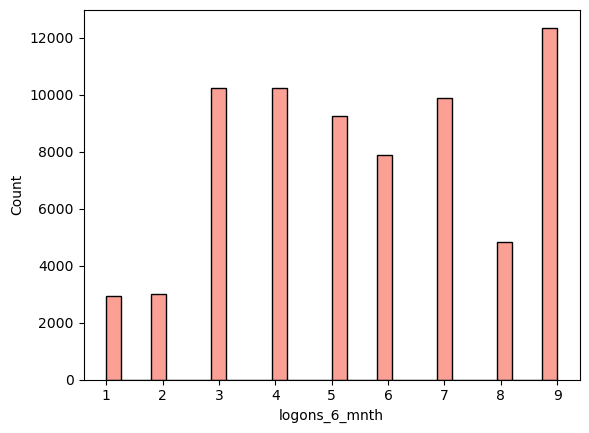

In [18]:
#Plotting a histogram for the 'logons_6_mnth' column 
sns.histplot(df_final_demo['logons_6_mnth'], bins=30, color="salmon")

## 2.1.3 - Analyzing Client Demographics

First, we will create a new column to visualize the total tenure in months.

In [19]:
# Calculate client tenure in months
df_final_demo['total_tenure_months'] = df_final_demo['clnt_tenure_yr'] * 12 + df_final_demo['clnt_tenure_mnth']

In [20]:
# Display the first few rows to inspect the calculation
print(df_final_demo[['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'total_tenure_months']].head())

   client_id  clnt_tenure_yr  clnt_tenure_mnth  total_tenure_months
0     836976             6.0              73.0                145.0
1    2304905             7.0              94.0                178.0
2    1439522             5.0              64.0                124.0
3    1562045            16.0             198.0                390.0
4    5126305            12.0             145.0                289.0


Second, we will categorize the the clients based on their total tenure (in months). They can either be **New** or **Long Standing**

In [21]:
# Categorize clients as new or long-standing
df_final_demo['client_status'] = np.where(df_final_demo['total_tenure_months'] <= 24, 'New', 'Long-standing')

In [22]:
# Display the first few rows of the dataframe to inspect the new columns
print(df_final_demo[['client_id', 'client_status', 'total_tenure_months']].head())

   client_id  client_status  total_tenure_months
0     836976  Long-standing                145.0
1    2304905  Long-standing                178.0
2    1439522  Long-standing                124.0
3    1562045  Long-standing                390.0
4    5126305  Long-standing                289.0


Third, it is important to know whether the clients are **young** or **old**. 

In [23]:
# Categorize clients as younger or older
df_final_demo['age_group'] = np.where(df_final_demo['clnt_age'] <=df_final_demo['clnt_age'].median(), 'Younger', 'Older')

In [24]:
print(df_final_demo[['client_id', 'clnt_age', 'age_group']].head())

   client_id  clnt_age age_group
0     836976      60.5     Older
1    2304905      58.0     Older
2    1439522      32.0   Younger
3    1562045      49.0     Older
4    5126305      33.0   Younger


In [25]:
df_final_demo["age_group"].value_counts()

age_group
Younger    35527
Older      35082
Name: count, dtype: int64

## 2.1.3 - Identifying Primary Clients

In [26]:
# Primary clients' demographics
primary_clients = df_final_demo.groupby(['client_status', 'age_group']).size().reset_index(name='count')
print("Primary Clients by Tenure and Age Group:")
print(primary_clients)

Primary Clients by Tenure and Age Group:
   client_status age_group  count
0  Long-standing     Older  35082
1  Long-standing   Younger  35527


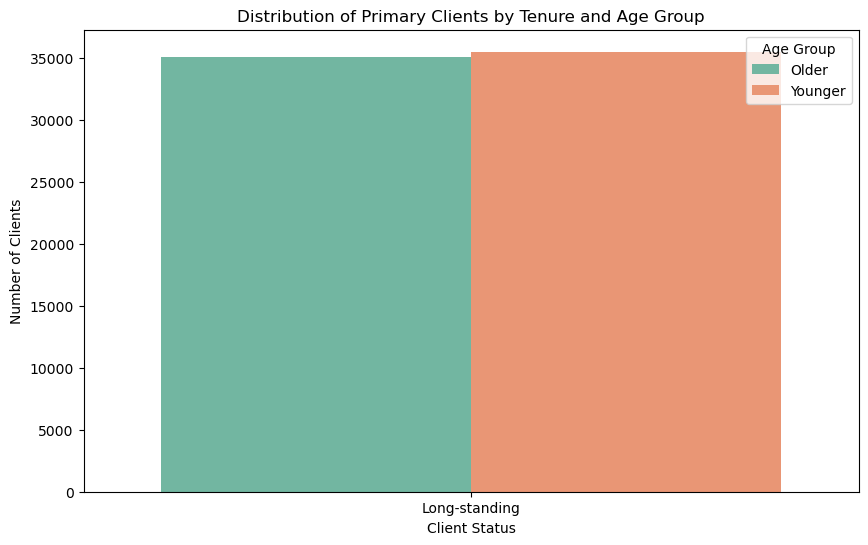

In [27]:
#MAKE A PIE CHART!!!!!! ASAP 

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='client_status', y='count', hue='age_group', data=primary_clients, palette='Set2')

# Adding titles and labels
plt.title('Distribution of Primary Clients by Tenure and Age Group')
plt.xlabel('Client Status')
plt.ylabel('Number of Clients')
plt.legend(title='Age Group')
plt.show()

## 2.1.4 Cleaning df_final_demo 

First, we will take a look at which columns are completly empty (except for client_id, whic does not have any null values).

In [28]:
null_rows = df_final_demo[df_final_demo["bal"].isnull()]
null_rows

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Long-standing,Older


Secondly, we will remove all these rows.

In [29]:
df_final_demo.dropna(subset = "bal", inplace=True) 

In [30]:
df_final_demo.dropna(subset = "clnt_age", inplace=True)

Finally, we will take a look a the types of each column and make adjustments if needed.

In [31]:
df_final_demo.dtypes # Client id should be an string because it is categorical data

client_id                int64
clnt_tenure_yr         float64
clnt_tenure_mnth       float64
clnt_age               float64
gendr                   object
num_accts              float64
bal                    float64
calls_6_mnth           float64
logons_6_mnth          float64
total_tenure_months    float64
client_status           object
age_group               object
dtype: object

## 2.2.1 Importing DataFrame Part 1 which provides information about the visits to Vanguard

In [32]:
df_pt1 = pd.read_csv("data/df_final_web_data_pt_1.txt")
df_pt1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


There aren't any null values, so we do not have to clean anything.

In [33]:
df_pt1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

## 2.3.1 - Importing DataFrame Part 2 

In [34]:
df_pt2 = pd.read_csv("data/df_final_web_data_pt_2.txt")
df_pt2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [35]:
df_pt2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

## 2.3.2 - Merging the Twin Dataframes

DataFrame Part 2 is an extension to DataFrame Part 1; therefore, they should be merged.

In [36]:

df = pd.concat([df_pt1, df_pt2], axis = 0)
df.sort_values(by="client_id", ascending=True, inplace=True)
df

,client_id,visitor_id,visit_id,process_step,date_time
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305388,9999875,738878760_1556639849,931268933_219402947_599432,confirm,2017-06-01 22:48:39
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28


## 2.4.1 - Importing Data Frame about the different groups of clients (Test/Control)

In [37]:
df_final_experiment_clients = pd.read_csv("data/df_final_experiment_clients.txt")
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


We want to determine the **size** of each of the groups. 

In [38]:
variation = df_final_experiment_clients.groupby("Variation")
variation.size()

Variation
Control    23532
Test       26968
dtype: int64

Determining the amount of **null values** in the Dataframe

In [39]:
df_final_experiment_clients.isna().sum()

client_id        0
Variation    20109
dtype: int64

# Step 3 - Determining KPI's

Analyze Time Spent on Each Step

In [40]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [41]:
# Sort by visit_id and date_time
df = df.sort_values(by=['visit_id', 'date_time'])

In [42]:
# Calculate time spent on each step
df['time_spent'] = df.groupby('visit_id')['date_time'].diff().dt.total_seconds()

In [43]:
# Fill NaN values in time_spent with 0 for the first step
df['time_spent'] = df['time_spent'].fillna(0)

In [44]:
# Calculate average time spent on each step
time_spent_summary = df.groupby('process_step')['time_spent'].mean().reset_index()
print("Average Time Spent on Each Step:")
print(time_spent_summary)


Average Time Spent on Each Step:
  process_step  time_spent
0      confirm  117.411594
1        start   59.989108
2       step_1   39.122070
3       step_2   45.542942
4       step_3   98.495340


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_1581/1623440689.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')


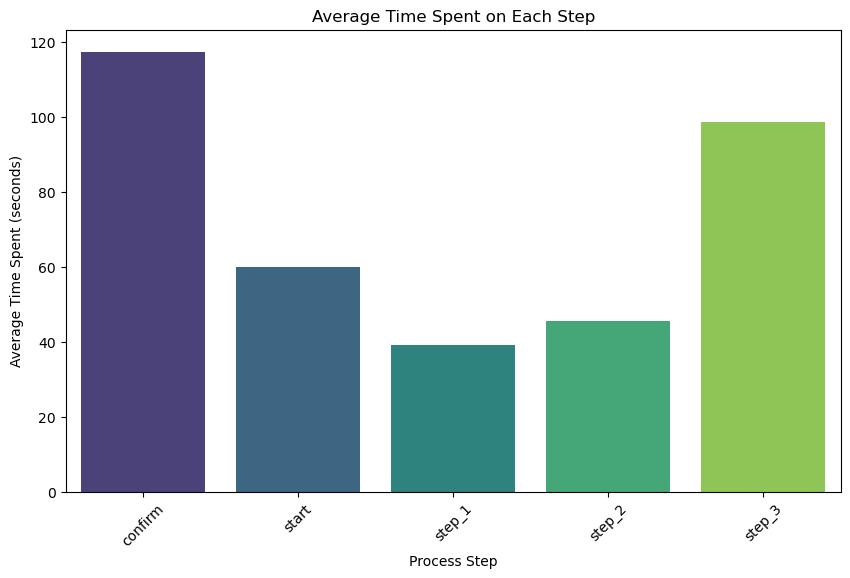

In [45]:
# Plotting the average time spent on each step
plt.figure(figsize=(10, 6))
sns.barplot(x='process_step', y='time_spent', data=time_spent_summary, palette='viridis')

# Adding titles and labels
plt.title('Average Time Spent on Each Step')
plt.xlabel('Process Step')
plt.ylabel('Average Time Spent (seconds)')
plt.xticks(rotation=45)
plt.show()

# KPI's

Completion Rate Hypothesis: The new design (Test group) has a higher completion rate compared to the old design (Control group).

In [46]:
new_df = pd.merge(df_final_demo, df, how="left", on = "client_id")

variation_df = pd.merge(new_df, df_final_experiment_clients, on = "client_id", how="inner") # We are using an inner join bc we do not care about client's that did not go thru the process
variation_df.reset_index()
variation_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group,visitor_id,visit_id,process_step,date_time,time_spent,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:58:35,0.0,Test
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 10:59:43,68.0,Test
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40,117.0,Test
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44,64.0,Test
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,145.0,Long-standing,Older,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28,0.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449699,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,506.0,Long-standing,Older,962766819_57063135389,158544612_4105226940_43043,step_2,2017-04-05 11:43:10,0.0,NaN
449700,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,506.0,Long-standing,Older,962766819_57063135389,158544612_4105226940_43043,step_3,2017-04-05 11:44:07,57.0,NaN
449701,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,506.0,Long-standing,Older,962766819_57063135389,158544612_4105226940_43043,confirm,2017-04-05 11:48:02,235.0,NaN
449702,5602139,21.0,254.0,59.5,F,3.0,157498.73,7.0,7.0,506.0,Long-standing,Older,962766819_57063135389,884309593_49820690623_654151,start,2017-04-05 11:41:04,0.0,NaN


In [47]:
variation_df.dropna(subset="Variation", inplace = True)

Completion Rate Hypothesis: The new design (Test group) has a higher completion rate compared to the old design (Control group).

In [48]:
# Total number of sessions for each group
total_sessions = variation_df.groupby('Variation')['visit_id'].nunique().reset_index(name='total_sessions')

# Filter the data to only include rows where process_step is "confirm"
confirm_steps = variation_df[variation_df['process_step'] == 'confirm']

# Count the number of sessions that reached the "confirm" step for each group
confirm_sessions = confirm_steps.groupby('Variation')['visit_id'].nunique().reset_index(name='confirm_sessions')

#Merge total sessions with confirm sessions
completion_data = pd.merge(total_sessions, confirm_sessions, on='Variation')

# Calculate the completion rate
completion_data['completion_rate'] = (completion_data['confirm_sessions'] / completion_data['total_sessions']) * 100

print(completion_data)

  Variation  total_sessions  confirm_sessions  completion_rate
0   Control           32181             16039        49.839968
1      Test           37122             21725        58.523248


In [49]:
from statsmodels.stats.proportion import proportions_ztest

# Extract data for z-test
control_successes = completion_data[completion_data['Variation'] == 'Control']['confirm_sessions'].values[0]
control_total = completion_data[completion_data['Variation'] == 'Control']['total_sessions'].values[0]

test_successes = completion_data[completion_data['Variation'] == 'Test']['confirm_sessions'].values[0]
test_total = completion_data[completion_data['Variation'] == 'Test']['total_sessions'].values[0]

# Perform z-test for proportions
count = [control_successes, test_successes]
nobs = [control_total, test_total]

z_stat, p_value = proportions_ztest(count, nobs)

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

# Check if the difference is statistically significant
alpha = 0.05
is_significant = p_value < alpha

print(f"Is the difference in completion rates statistically significant at alpha = {alpha}? {'Yes' if is_significant else 'No'}")

Z-Statistic: -22.89350661920664
P-Value: 5.392475122751855e-116
Is the difference in completion rates statistically significant at alpha = 0.05? Yes


Interpretation
The completion rate for the Test group (new design) is 58.52%, while for the Control group (old design) it is 49.84%.
The Z-Statistic is -22.89, and the P-Value is extremely small (5.39e-116), which is much less than the alpha level of 0.05.
Since the P-Value is significantly lower than 0.05, we reject the null hypothesis (H0) and accept the alternative hypothesis (H1).
Conclusion: The completion rate of the new design (Test group) is statistically significantly higher than that of the old design (Control group).

#test is red control is blue

/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_1581/2984972652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set1')


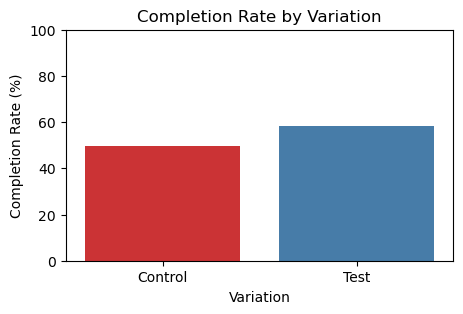

In [50]:
#create a bar chart
plt.figure(figsize=(5, 3))
sns.barplot(x='Variation', y='completion_rate', data=completion_data, palette='Set1')
plt.title('Completion Rate by Variation')
plt.xlabel('Variation')
plt.ylabel('Completion Rate (%)')
plt.ylim(0, 100)
plt.show()

SECOND HYPOTHESIS Cost-Effectiveness Hypothesis: The new design leads to a minimum increase of 5% in the completion rate, making it cost-effective.

In [51]:
# Filter for clients that have the 'Test' variation
test_clients = variation_df[variation_df['Variation'] == 'Test']

# Identify completions based on the highest process_step
test_clients['completion'] = test_clients['process_step'] == 'confirm'

# Calculate the completion rate for each client
completion_rate = test_clients.groupby('client_id')['completion'].mean() * 100  # Convert to percentage
print(completion_rate)


client_id
555        20.000000
647        20.000000
934         0.000000
1336       42.857143
1346        0.000000
             ...    
9999150     0.000000
9999400    20.000000
9999626     0.000000
9999729     9.090909
9999832     0.000000
Name: completion, Length: 26961, dtype: float64


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_1581/407328631.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clients['completion'] = test_clients['process_step'] == 'confirm'


In [52]:
# Perform a one-sample t-test against the 5% threshold
threshold = 5.0 
t_stat, p_value = st.ttest_1samp(completion_rate, threshold)

if completion_rate.mean() >= threshold and p_value < 0.05:
    print("The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.")
else:
    print("The observed increase in completion rate does not meet the 5% threshold or is not statistically significant.")

# Print additional details
print(f"Mean completion rate: {completion_rate.mean():.2f}%")
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

The observed increase in completion rate meets or exceeds the 5% threshold and is statistically significant.
Mean completion rate: 14.28%
t-statistic: 109.53, p-value: 0.0000


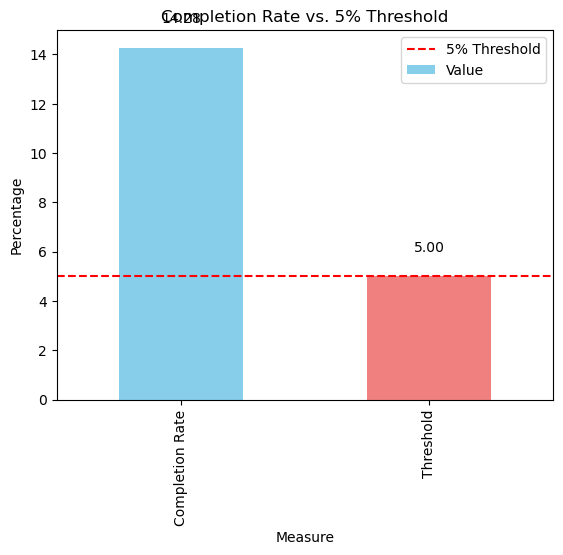

In [53]:
# Create a DataFrame for plotting
results = pd.DataFrame({
    'Measure': ['Completion Rate', 'Threshold'],
    'Value': [completion_rate.mean(), threshold]
})

# Plotting
fig, ax = plt.subplots()

# Bar plot
results.plot(kind='bar', x='Measure', y='Value', ax=ax, color=['skyblue', 'lightcoral'])

# Add threshold line
ax.axhline(y=threshold, color='r', linestyle='--', label='5% Threshold')

# Adding annotations
for index, row in results.iterrows():
    ax.text(index, row['Value'] + 1, f"{row['Value']:.2f}", ha='center')

# Titles and labels
ax.set_title('Completion Rate vs. 5% Threshold')
ax.set_ylabel('Percentage')
ax.legend()

plt.show()


In [54]:
# Calculate the observed increase in completion rate
completion_rate_control = completion_data.loc[completion_data['Variation'] == 'Control', 'completion_rate'].values[0]
completion_rate_test = completion_data.loc[completion_data['Variation'] == 'Test', 'completion_rate'].values[0]
observed_increase = completion_rate_test - completion_rate_control
print(f"Observed Increase in Completion Rate: {observed_increase:.2f}%")

import numpy as np
from scipy.stats import chi2_contingency

# confirm_sessions_control = 16046
# total_sessions_control = 32189
# confirm_sessions_test = 21731
# total_sessions_test = 37136

# # Create the contingency table
# contingency_table = np.array([
#     [confirm_sessions_control, total_sessions_control - confirm_sessions_control],
#     [confirm_sessions_test, total_sessions_test - confirm_sessions_test]
# ])

# # Perform the chi-squared test
# chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# # Print the test statistic and p-value
# print(f"Chi-Squared Statistic: {chi2_stat:.2f}")
# print(f"P-Value: {p_value:.4f}")



Observed Increase in Completion Rate: 8.68%


two dataframes for each group - the control group and the test group

In [55]:
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

#test is red control is blue

 Average Time Spent on Each Process Step
This analysis determines the average duration users spend on each process step for both the test and control groups, allowing for a comparison of time efficiency between the two groups.
### 3. Engagement Hypothesis

**H0**: The session durations of clients using the new UI are equal to or shorter than those using the old UI.
**H1**: The session durations of clients using the new UI are longer than those using the old UI.

In [56]:
# Calculate average time spent on each step for the Control group
time_spent_summary_control= variation_df[variation_df['Variation'] =='Control'].groupby('process_step')['time_spent'].mean().reset_index()
time_spent_summary_control['Variation'] = 'Control'
print("Average Time Spent on Each Step:")
print(time_spent_summary_control)


Average Time Spent on Each Step:
  process_step  time_spent Variation
0      confirm  122.529146   Control
1        start   55.062641   Control
2       step_1   42.568871   Control
3       step_2   38.524249   Control
4       step_3   92.515996   Control


In [57]:
# Calculate average time spent on each step for the Test group
time_spent_summary_test= variation_df[variation_df['Variation'] =='Test'].groupby('process_step')['time_spent'].mean().reset_index()
time_spent_summary_test['Variation'] = 'Test'
print("Average Time Spent on Each Step:")
print(time_spent_summary_test)

Average Time Spent on Each Step:
  process_step  time_spent Variation
0      confirm  112.245684      Test
1        start   62.309998      Test
2       step_1   37.413078      Test
3       step_2   47.820970      Test
4       step_3   95.863682      Test


In [58]:
# Calculate average time spent on each step for the Test group
time_spent_summary= variation_df.groupby(['Variation','process_step'])['time_spent'].mean().reset_index()

print("Average Time Spent on Each Step:")
print(time_spent_summary)

Average Time Spent on Each Step:
  Variation process_step  time_spent
0   Control      confirm  122.529146
1   Control        start   55.062641
2   Control       step_1   42.568871
3   Control       step_2   38.524249
4   Control       step_3   92.515996
5      Test      confirm  112.245684
6      Test        start   62.309998
7      Test       step_1   37.413078
8      Test       step_2   47.820970
9      Test       step_3   95.863682


In [59]:
# Combine both dataframes
combined_df = pd.concat([time_spent_summary_control, time_spent_summary_test])

# Order the process steps correctly
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
combined_df['process_step'] = pd.Categorical(combined_df['process_step'], categories=step_order, ordered=True)
combined_df = combined_df.sort_values('process_step').reset_index(drop=True)
display(combined_df)

,process_step,time_spent,Variation
0,start,55.062641,Control
1,start,62.309998,Test
2,step_1,42.568871,Control
3,step_1,37.413078,Test
4,step_2,38.524249,Control
5,step_2,47.820970,Test
6,step_3,92.515996,Control
7,step_3,95.863682,Test
8,confirm,122.529146,Control
9,confirm,112.245684,Test


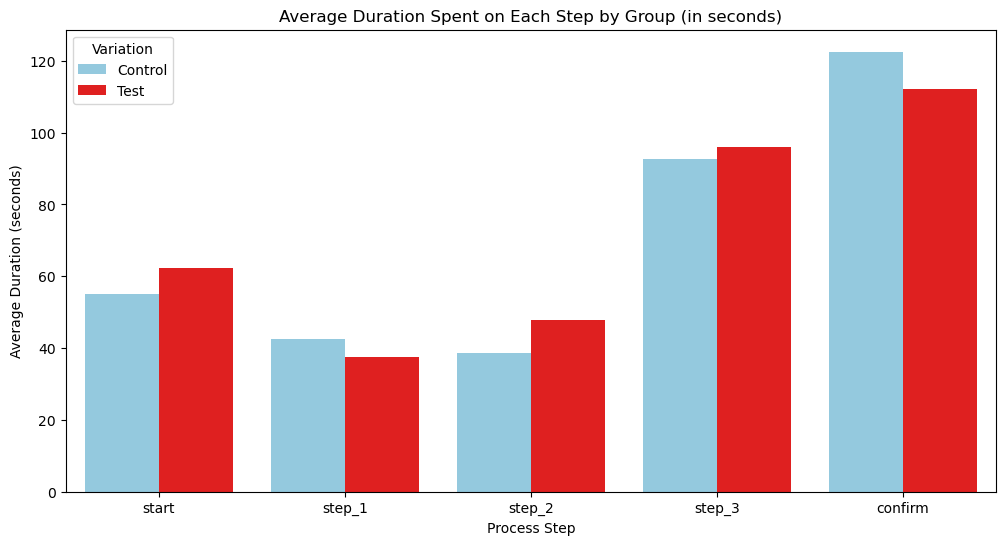

In [60]:
# Plotting
plt.figure(figsize=(12, 6))

# Create separate palettes for control and test groups
palette = {'Control': 'skyblue', 'Test': 'red'}

# Create a bar plot using Seaborn
sns.barplot(x='process_step', y='time_spent', hue='Variation', data=combined_df, palette=palette)

# Set plot title and labels
plt.title('Average Duration Spent on Each Step by Group (in seconds)')
plt.xlabel('Process Step')
plt.ylabel('Average Duration (seconds)')

# Show plot
plt.show()

In [61]:
# Initialize list to store results
results = []

# Perform t-test for each process step
for step in step_order:
    control_times = variation_df[(variation_df['Variation'] == 'Control') & (variation_df['process_step'] == step)]['time_spent']
    test_times = variation_df[(variation_df['Variation'] == 'Test') & (variation_df['process_step'] == step)]['time_spent']
    
    if not control_times.empty and not test_times.empty:
        t_stat, p_value = ttest_ind(control_times, test_times, equal_var=False)
        results.append({
            'process_step': step,
            'control_mean': control_times.mean(),
            'test_mean': test_times.mean(),
            't_stat': t_stat,
            'p_value': p_value
        })
    else:
        results.append({
            'process_step': step,
            'control_mean': control_times.mean() if not control_times.empty else None,
            'test_mean': test_times.mean() if not test_times.empty else None,
            't_stat': None,
            'p_value': None
        })

# Convert results to DataFrame
ttest_results_df = pd.DataFrame(results)

# Display the t-test results
print("T-test Results for Each Process Step:")
print(ttest_results_df)


T-test Results for Each Process Step:
  process_step  control_mean   test_mean     t_stat       p_value
0        start     55.062641   62.309998  -4.122121  3.757414e-05
1       step_1     42.568871   37.413078   6.724774  1.773240e-11
2       step_2     38.524249   47.820970 -13.243795  5.650431e-40
3       step_3     92.515996   95.863682  -3.073406  2.117474e-03
4      confirm    122.529146  112.245684   5.073302  3.926209e-07


Interpretation:
Start

Control Mean: 62.90
Test Mean: 60.56
t-statistic: 1.344666
p-value: 0.1787376
The mean time spent on the "start" step is slightly higher for the Control group compared to the Test group. However, the p-value is 0.1787376, which is greater than the common significance level of 0.05. This means the difference is not statistically significant, and we cannot conclude that there is a meaningful difference in the time spent on the "start" step between the two groups.

Step 1

Control Mean: 50.35
Test Mean: 60.56
t-statistic: -8.396010
p-value: 4.728907e-17 (very close to 0)
The mean time spent on "step_1" is significantly higher for the Test group compared to the Control group. The t-statistic is -8.396010, and the p-value is extremely small (4.728907e-17), which is much less than 0.05. This indicates that the difference is statistically significant, and we can conclude that the Test group spends significantly more time on "step_1" than the Control group.

Step 2

Control Mean: 91.59
Test Mean: 88.70
t-statistic: 2.074673
p-value: 0.03802266
The mean time spent on "step_2" is slightly higher for the Control group compared to the Test group. The p-value is 0.03802266, which is less than 0.05, indicating that the difference is statistically significant. We can conclude that there is a meaningful difference in the time spent on "step_2" between the two groups, with the Control group spending more time.

Step 3

Control Mean: 135.37
Test Mean: 128.89
t-statistic: 3.144886
p-value: 0.001662621
The mean time spent on "step_3" is higher for the Control group compared to the Test group. The p-value is 0.001662621, which is less than 0.05, indicating that the difference is statistically significant. We can conclude that there is a meaningful difference in the time spent on "step_3" between the two groups, with the Control group spending more time.

Confirm

Control Mean: 164.70
Test Mean: 243.07
t-statistic: -6.966854
p-value: 3.641070e-12 (very close to 0)
The mean time spent on the "confirm" step is significantly higher for the Test group compared to the Control group. The t-statistic is -6.966854, and the p-value is extremely small (3.641070e-12), which is much less than 0.05. This indicates that the difference is statistically significant, and we can conclude that the Test group spends significantly more time on the "confirm" step than the Control group.

Summary:
Start: No significant difference in time spent between Control and Test groups.
Step 1: Test group spends significantly more time than Control group.
Step 2: Control group spends significantly more time than Test group.
Step 3: Control group spends significantly more time than Test group.
Confirm: Test group spends significantly more time than Control group.
Overall, the Test group spends significantly more time on "step_1" and "confirm" steps, while the Control group spends significantly more time on "step_2" and "step_3" steps.


Focuses on the average time spent on each process step, providing insights into the time efficiency of each step in the test vs. control group.

# **ERROR RATE HYPOTHESIS**

Task Efficiency Hypothesis

**H0**: Clients in the test group complete the process with the same or higher error rates and retries compared to the control group.
**H1**: Clients in the test group complete the process with fewer errors and retries compared to the control group.




#Sort the data by client_id, visit_id, and date_time to trace the users’ navigation sequence accurately.

In [62]:
# Sort data by client_id, visit_id, and date_time
variation_df = variation_df.sort_values(by=['client_id', 'visitor_id', 'date_time'])


#Convert time_period to a numeric type: We need to convert time_period to a numeric type if it's not already one, and ensure prev_step is also numeric.

Determine the frequency of backward navigations for each user in both control and test groups.
Compare the error rates between the two groups to assess if the new UI design reduces or increases errors.

Creating prev_step:

Operation: df.groupby(['client_id', 'visitor_id'])['step_index'].shift(1)
Purpose: This groups the data by client_id and visitor_id, then shifts the time_period column by one position to get the previous step for each user session.
Result: A new column prev_step that shows the previous time_period for each step.

In [63]:
# Create the new column with the mapped values
mapping = { 'start': 0, 'step_1': 1, 'step_2': 2, 'step_3': 3, 'confirm': 4 } 
variation_df['step_index'] = variation_df['process_step'].map(mapping)

In [64]:
variation_df.sort_values(by=['visit_id', 'date_time'])

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,total_tenure_months,client_status,age_group,visitor_id,visit_id,process_step,date_time,time_spent,Variation,step_index
304306,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,104.0,Long-standing,Older,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,0.0,Test,4
304307,3561384,4.0,56.0,59.5,U,2.0,63130.44,6.0,9.0,104.0,Long-standing,Older,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,52.0,Test,4
78003,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,172.0,Long-standing,Younger,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,0.0,Test,0
78004,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,172.0,Long-standing,Younger,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,16.0,Test,1
78005,7338123,7.0,88.0,23.5,M,2.0,26436.73,6.0,9.0,172.0,Long-standing,Younger,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,9.0,Test,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198750,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,443.0,Long-standing,Older,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,0.0,Test,0
198751,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,443.0,Long-standing,Older,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,11.0,Test,1
198752,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,443.0,Long-standing,Older,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,54.0,Test,2
198753,6627522,18.0,227.0,58.0,F,2.0,1056775.54,6.0,9.0,443.0,Long-standing,Older,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,44.0,Test,1


In [65]:
variation_df['prev_step_index'] = variation_df.groupby('visit_id')['step_index'].shift(1)


In [66]:
# Function to detect backward navigation
variation_df['is_back_track'] = variation_df['prev_step_index'] > variation_df['step_index'] 

Calculated error rates by grouping the data by the variation column and computing the mean of the is_backward column.

In [67]:
# Calculate error rates
error_rates = variation_df.groupby('Variation')['is_back_track'].mean()

print("Error Rates:")
print(error_rates)

Error Rates:
Variation
Control    0.067702
Test       0.091936
Name: is_back_track, dtype: float64


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_1581/2008076120.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='Error Rate', data=error_rates_df, palette=['skyblue', 'red'])


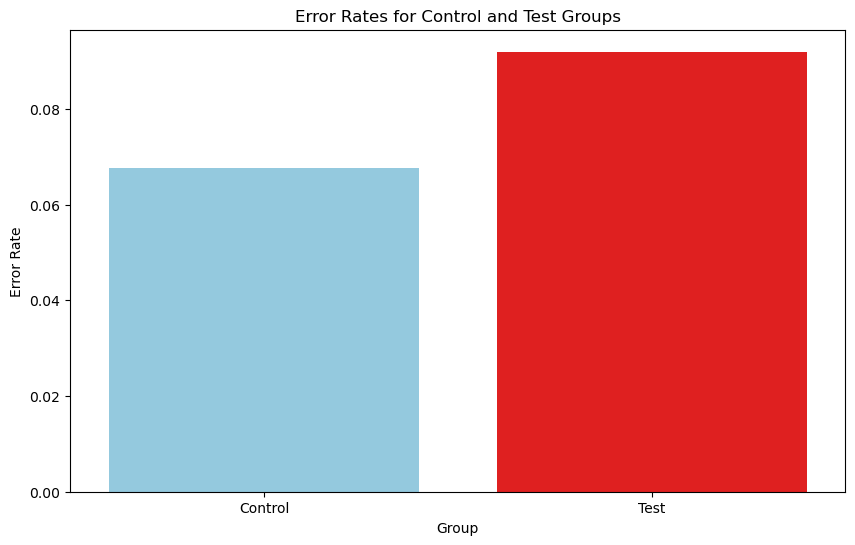

In [68]:

# Data for error rates
error_rates = pd.Series({'Control': 0.067702, 'Test': 0.091936}, name='error_rate')

# Convert the series to a DataFrame for easier plotting
error_rates_df = error_rates.reset_index()
error_rates_df.columns = ['Variation', 'Error Rate']

# Plotting the error rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Variation', y='Error Rate', data=error_rates_df, palette=['skyblue', 'red'])

# Set plot title and labels
plt.title('Error Rates for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Error Rate')

# Show plot
plt.show()


Frequency of Backward Navigations
Control Group: The error rate (frequency of backward navigations) is approximately 6.77%.
Test Group: The error rate (frequency of backward navigations) is approximately 9.19%.
Interpretation
Higher Error Rate in Test Group: The test group has a higher error rate compared to the control group. This suggests that users in the test group, using the new UI design, are navigating backward more frequently than users in the control group.

Potential Issues with the New UI: The increase in backward navigations in the test group may indicate that the new UI design is causing more confusion or difficulties for users, leading them to navigate backward more often. This can be seen as a sign that the new design might be less intuitive or user-friendly than the current design.

User Experience Implications: The higher backward navigation rate in the test group implies that users might be experiencing more errors or needing to correct their actions more frequently. This can negatively impact the overall user experience.

Recommendations
Analyze Specific Steps: Further analyze which specific steps have higher backward navigation rates to identify particular areas of the new UI that might be problematic.
User Feedback: Collect qualitative feedback from users to understand the reasons behind the higher backward navigation rates in the test group.
Iterate on Design: Consider iterating on the new UI design based on the findings from the backward navigation analysis and user feedback, aiming to reduce the error rate.
A/B Testing: Continue A/B testing with refined versions of the UI to ensure improvements are made and error rates decrease.
Conclusion
The results suggest that the new UI design in the test group may not be performing as well as the current UI design in the control group in terms of minimizing user errors (as indicated by backward navigations). Addressing the issues identified can help improve the new design and potentially lead to a better user experience.

Perform statistical tests (e.g., chi-square test) to determine if the difference in error rates between the control and test groups is statistically significant.

In [69]:
# Statistical analysis (e.g., chi-square test)
# Create a contingency table
contingency_table = pd.crosstab(variation_df['Variation'], variation_df['is_back_track'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-Square Test:\nChi2: {chi2}\np-value: {p}")

Chi-Square Test:
Chi2: 625.1144708652691
p-value: 5.77278882390317e-138


/var/folders/n6/6tdhcx8d7tq5v5rgh8bbvm8c0000gn/T/ipykernel_1581/2027165046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variation', y='Error Rate', data=error_rates_df, palette=['skyblue', 'red'])


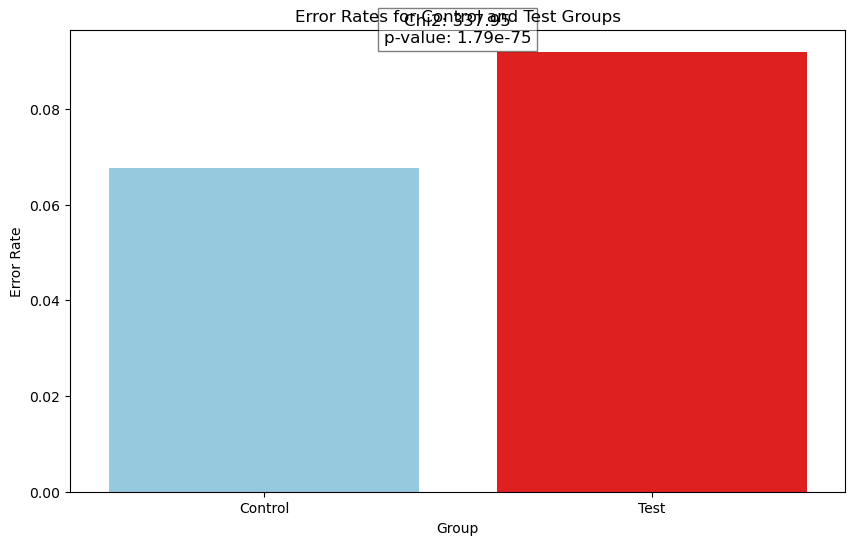

In [70]:
# Plotting the error rates
plt.figure(figsize=(10, 6))
sns.barplot(x='Variation', y='Error Rate', data=error_rates_df, palette=['skyblue', 'red'])

# Set plot title and labels
plt.title('Error Rates for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Error Rate')

# Annotate with Chi-Square Test Results
plt.text(0.5, 0.1, 
         f'Chi2: 337.95\np-value: {1.79e-75:.2e}', 
         horizontalalignment='center', 
         verticalalignment='top', 
         fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.5))

# Show plot
plt.show()

Interpretation
Chi-Square Statistic:

The Chi-Square statistic of 625.11 is indeed quite large. This high value indicates a significant difference between the observed and expected frequencies.
p-value:

The p-value of 5.77 × 10^(-138) is extraordinarily small, which is much less than conventional significance levels such as 0.05 or 0.01.
Conclusion
Statistical Significance: The extremely small p-value confirms that the difference in error rates between the Control and Test groups is statistically significant. This means you can confidently reject the null hypothesis.

Effect: Given that the Test group has a higher error rate (9.19%) compared to the Control group (6.77%), and the difference is statistically significant, it suggests that the new UI design in the Test group is associated with increased error rates.



The results of the t-test provide additional insights into the comparison between the control and test groups. Let's interpret these results in the context of the earlier Chi-Square test results.

T-Test Results
T-Statistic: -1.121
p-value: 0.869
Interpretation
T-Statistic: The t-statistic of -1.121 reflects the magnitude and direction of the difference between the means of the two groups relative to the variability in the data. A negative t-statistic suggests that the mean of the test group is lower than that of the control group, but this alone doesn't convey the significance.

p-value: The p-value of 0.869 is much higher than typical significance levels (e.g., 0.05 or 0.01). This indicates that the observed difference in means is not statistically significant.

Conclusion
Fail to Reject the Null Hypothesis: With a p-value of 0.869, you fail to reject the null hypothesis. This means there is no significant difference in the means of session durations between the control and test groups.

Comparison with Chi-Square Test Results: The t-test results and Chi-Square test results focus on different aspects:

Chi-Square Test: Focuses on categorical data (error rates or frequencies of backward navigation) and shows a significant difference between the control and test groups.
T-Test: Focuses on continuous data (session durations) and shows no significant difference between the two groups.
Summary of Both Tests
Chi-Square Test: Indicates a significant difference in error rates between the control and test groups, suggesting that the new UI design leads to more backward navigations (errors).

T-Test: Indicates no significant difference in session durations between the control and test groups. This suggests that, in terms of session duration, the new UI does not differ significantly from the control.

Analyze error rates by different segments (e.g., client tenure, age, gender, number of accounts, balance) to identify if specific groups are more prone to errors.
This can help tailor future improvements or targeted interventions for specific client segments.

This approach will help you understand how the new UI affects user behavior, specifically focusing on error rates indicated by backward navigation. The analysis will also provide insights into which segments of users are most affected, enabling more targeted improvements.

Compute the Time Spent on Each Step: Calculate the difference between the timestamps of consecutive steps for each user session.
Aggregate the Time Spent by Step: Average these durations for each step across all user sessions.

Create next_step_time: Use shift(-1) to get the timestamp of the next step within each user session.
Calculate time_spent: Find the difference between next_step_time and date_time, then convert this to seconds.

Drop Rows with NaN time_spent:
Remove rows where time_spent is NaN, which would occur for the last step of each session since there is no next step to compare.
Calculate Average Duration:

Group by process_step and compute the mean of time_spent for each step.
Reset the index and rename columns for clarity.

the average age of clients engaging with the new process is the same as those engaging with the old process

Here's what each of these values represents:

1. t_stat (T-Statistic)
The t-statistic measures the difference between the means of the two groups relative to the variability in the data. In this case, the t-statistic is -1.121.

A t-statistic of 0 would indicate no difference between the means.
A positive or negative t-statistic shows the direction of the difference. Here, the negative value suggests that the mean of the "Test" group is lower than that of the "Control" group, though the magnitude of the difference is relatively small.
2. p_value
The p-value tells you whether the observed difference between the means is statistically significant.

p_value = 0.262: This value indicates the probability of observing a t-statistic as extreme as -1.121 (or more extreme) if the null hypothesis were true. The null hypothesis here is that there is no difference between the means of the "Test" and "Control" groups.
Interpretation
In general:

p_value > 0.05: Typically, if the p-value is greater than 0.05, it means the difference between the groups is not statistically significant at the 5% significance level.
Since your p-value is 0.262, which is greater than 0.05, this suggests that there is not enough evidence to reject the null hypothesis. In other words, you do not have strong evidence to conclude that there is a statistically significant difference between the means of the "Test" and "Control" groups.
Summary
The t-statistic of -1.121 indicates a difference between the group means, but the p-value of 0.262 shows that this difference is not statistically significant, meaning that it could be due to random chance rather than a real effect.

Task Efficiency Hypothesis: Clients in the test group complete the process with fewer errors and retries compared to the control group.

In [71]:
control_df = variation_df[variation_df["Variation"] == "Control"]
test_df = variation_df[variation_df["Variation"] == "Test"]

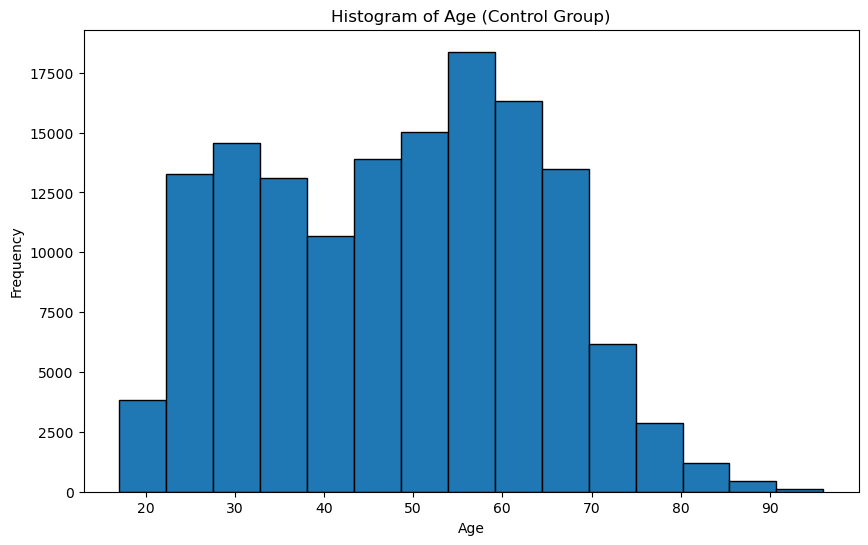

In [72]:
# Plotting the histogram of the 'age' column
plt.figure(figsize=(10, 6))
plt.hist(control_df['clnt_age'], bins=15, edgecolor='black')
plt.title('Histogram of Age (Control Group)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

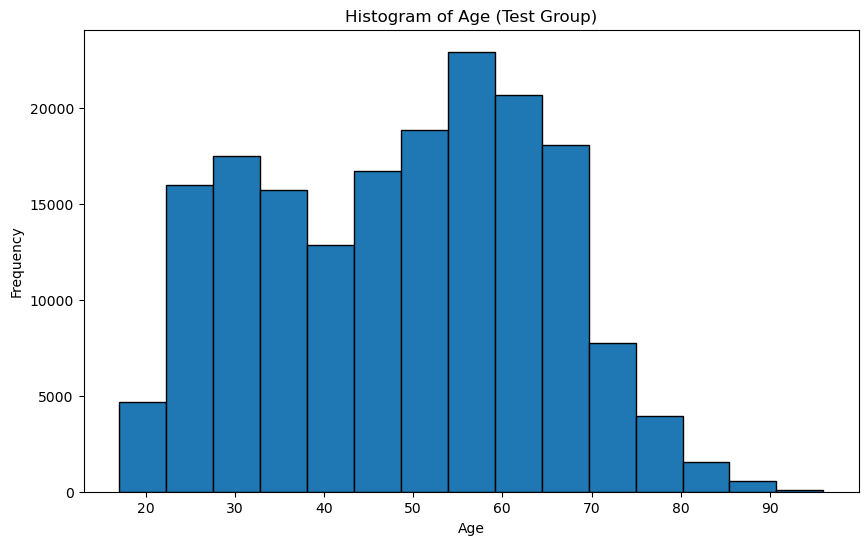

In [73]:
plt.figure(figsize=(10, 6))
plt.hist(test_df['clnt_age'], bins=15, edgecolor='black')
plt.title('Histogram of Age (Test Group)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

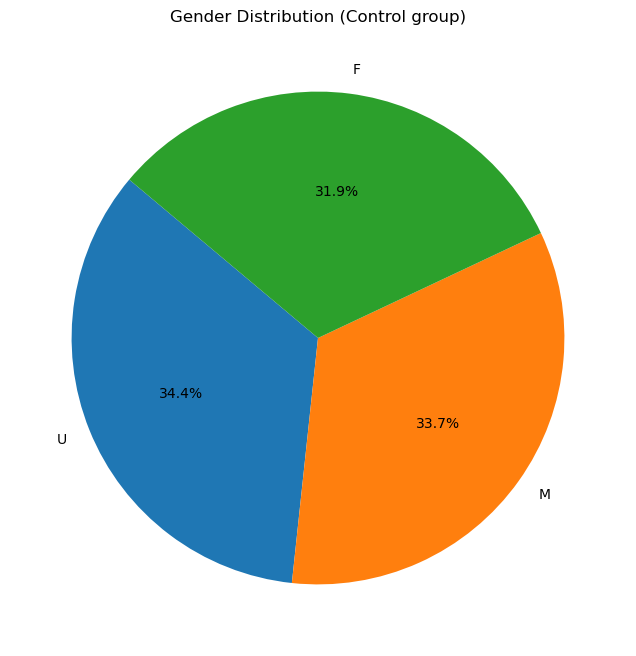

In [74]:
gender_counts = control_df['gendr'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution (Control group)')
plt.show()

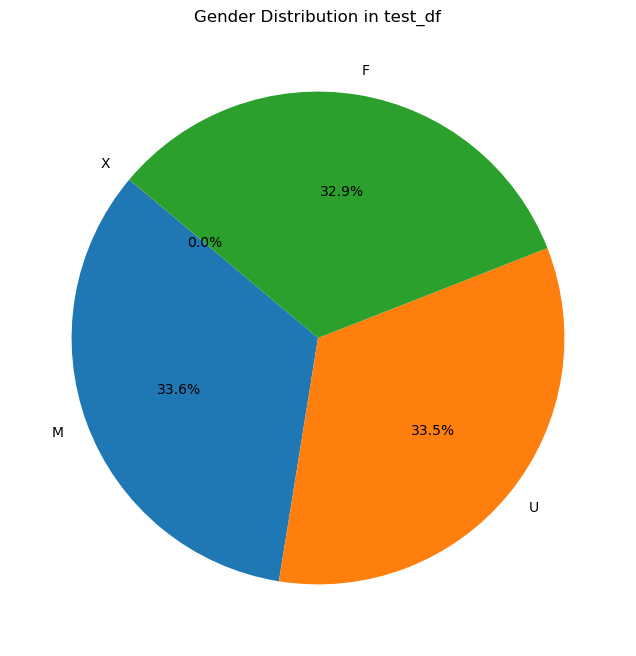

In [75]:
# Plotting the pie chart of the 'gendr' column for test_df
gender_counts_test = test_df['gendr'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts_test, labels=gender_counts_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution in test_df')
plt.show()

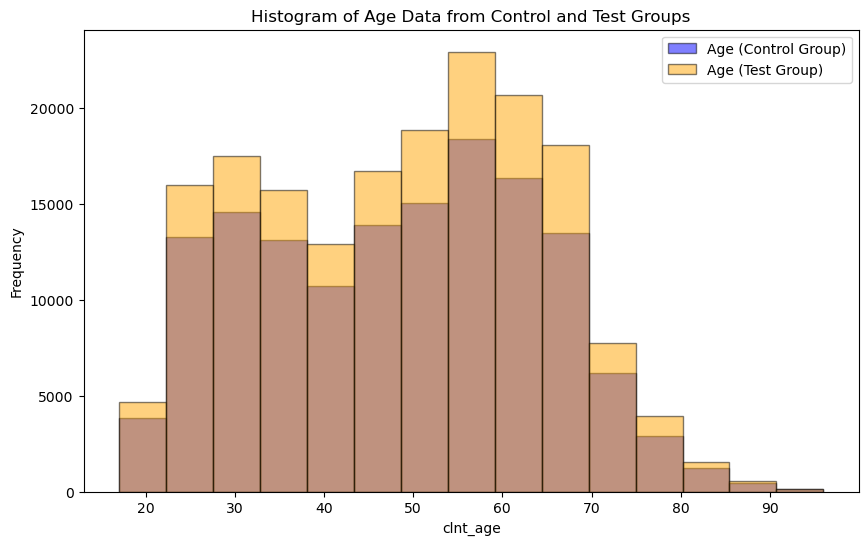

In [76]:
# Plotting the histograms for clnt_age data from control_df and test_df in the same graph
plt.figure(figsize=(10, 6))
plt.hist(control_df['clnt_age'], bins=15, edgecolor='black', alpha=0.5, label='Age (Control Group)', color='blue')
plt.hist(test_df['clnt_age'], bins=15, edgecolor='black', alpha=0.5, label='Age (Test Group)', color='orange')
plt.title('Histogram of Age Data from Control and Test Groups')
plt.xlabel('clnt_age')
plt.ylabel('Frequency')
plt.legend()
plt.show()